In [7]:
#TITANIC DATA
#Data Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#2nd step: reading the dataset
df = pd.read_csv('titanic.csv')

In [9]:
#printing data types
for i in df.columns:
  print(f"Data type of {i}: {df.dtypes[i]}")

Data type of PassengerId: int64
Data type of Survived: int64
Data type of Pclass: int64
Data type of Name: object
Data type of Sex: object
Data type of Age: float64
Data type of SibSp: int64
Data type of Parch: int64
Data type of Ticket: object
Data type of Fare: float64
Data type of Cabin: object
Data type of Embarked: object


In [10]:
#total instances
for i in df.columns:
  print(f"instances in {i}: {len(df[i].value_counts(dropna=True))}")

instances in PassengerId: 891
instances in Survived: 2
instances in Pclass: 3
instances in Name: 891
instances in Sex: 2
instances in Age: 88
instances in SibSp: 7
instances in Parch: 7
instances in Ticket: 681
instances in Fare: 248
instances in Cabin: 147
instances in Embarked: 3


In [11]:
#no of nulls
for i in df.columns:
  print(f"No of nulls in {i}: {df[i].isnull().sum()}")

No of nulls in PassengerId: 0
No of nulls in Survived: 0
No of nulls in Pclass: 0
No of nulls in Name: 0
No of nulls in Sex: 0
No of nulls in Age: 177
No of nulls in SibSp: 0
No of nulls in Parch: 0
No of nulls in Ticket: 0
No of nulls in Fare: 0
No of nulls in Cabin: 687
No of nulls in Embarked: 2


In [80]:
#no of outliers
num_outliers=0
for i in df.columns:
  if df[i].dtype in ['float64','int64']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    higher = Q3+1.5*IQR
    outliers = df[(df[i] < lower) | (df[i] > higher)]
    num_outliers = outliers.shape[0]
    print(f"Number of outliers in {i}: {num_outliers}")


Number of outliers in PassengerId: 0
Number of outliers in Survived: 0
Number of outliers in Pclass: 0
Number of outliers in Age: 11
Number of outliers in SibSp: 46
Number of outliers in Parch: 213
Number of outliers in Fare: 116


In [24]:
#min values
for i in df.columns:
    mini = df[i].dropna().min()
    print(f"Min value in {i} is {mini}")

Min value in PassengerId is 1
Min value in Survived is 0
Min value in Pclass is 1
Min value in Name is Abbing, Mr. Anthony
Min value in Sex is female
Min value in Age is 0.42
Min value in SibSp is 0
Min value in Parch is 0
Min value in Ticket is 110152
Min value in Fare is 0.0
Min value in Cabin is A10
Min value in Embarked is C


In [25]:
#max value
for i in df.columns:
    maxi = df[i].dropna().max()
    print(f"Max value in {i} is {maxi}")

Max value in PassengerId is 891
Max value in Survived is 1
Max value in Pclass is 3
Max value in Name is van Melkebeke, Mr. Philemon
Max value in Sex is male
Max value in Age is 80.0
Max value in SibSp is 8
Max value in Parch is 6
Max value in Ticket is WE/P 5735
Max value in Fare is 512.3292
Max value in Cabin is T
Max value in Embarked is S


In [114]:
for i in df.columns:
    modee = df[i].mode()[0]
    print(f"Mode value in {i} is {modee}")

Mode value in PassengerId is 1
Mode value in Survived is 0
Mode value in Pclass is 3
Mode value in Name is Abbing, Mr. Anthony
Mode value in Sex is male
Mode value in Age is 24.0
Mode value in SibSp is 0
Mode value in Parch is 0
Mode value in Ticket is 1601
Mode value in Fare is 8.05
Mode value in Cabin is B96 B98
Mode value in Embarked is S


In [79]:
for i in df.columns:
  if df[i].dtype in ['int64','float64']:
    mean = df[i].dropna().mean()
    print(f"Mean value in {i} is {mean}")

Mean value in PassengerId is 446.0
Mean value in Survived is 0.3838383838383838
Mean value in Pclass is 2.308641975308642
Mean value in Age is 29.69911764705882
Mean value in SibSp is 0.5230078563411896
Mean value in Parch is 0.38159371492704824
Mean value in Fare is 32.204207968574636


In [28]:
for i in df.columns:
  if i not in ['Embarked','Name','Ticket','Sex','Cabin']:
    med = df[i].dropna().median()
    print(f"Median value in {i} is {med}")

Median value in PassengerId is 446.0
Median value in Survived is 0.0
Median value in Pclass is 3.0
Median value in Age is 28.0
Median value in SibSp is 0.0
Median value in Parch is 0.0
Median value in Fare is 14.4542


In [29]:
for i in df.columns:
  if i not in ['Embarked','Name','Ticket','Sex','Cabin']:
    vari = df[i].dropna().var()
    print(f"varience in {i} is {vari}")

varience in PassengerId is 66231.0
varience in Survived is 0.2367722165474984
varience in Pclass is 0.6990151199889065
varience in Age is 211.0191247463081
varience in SibSp is 1.2160430774662894
varience in Parch is 0.6497282437357467
varience in Fare is 2469.436845743117


In [30]:
for i in df.columns:
  if i not in ['Embarked','Name','Ticket','Sex','Cabin']:
    std = df[i].std()
    print(f"Standard deviation in {i} is {std}")

Standard deviation in PassengerId is 257.3538420152301
Standard deviation in Survived is 0.4865924542648585
Standard deviation in Pclass is 0.8360712409770513
Standard deviation in Age is 14.526497332334044
Standard deviation in SibSp is 1.1027434322934275
Standard deviation in Parch is 0.8060572211299559
Standard deviation in Fare is 49.693428597180905


Histogram for PassengerId :
PassengerId has a normal distribution


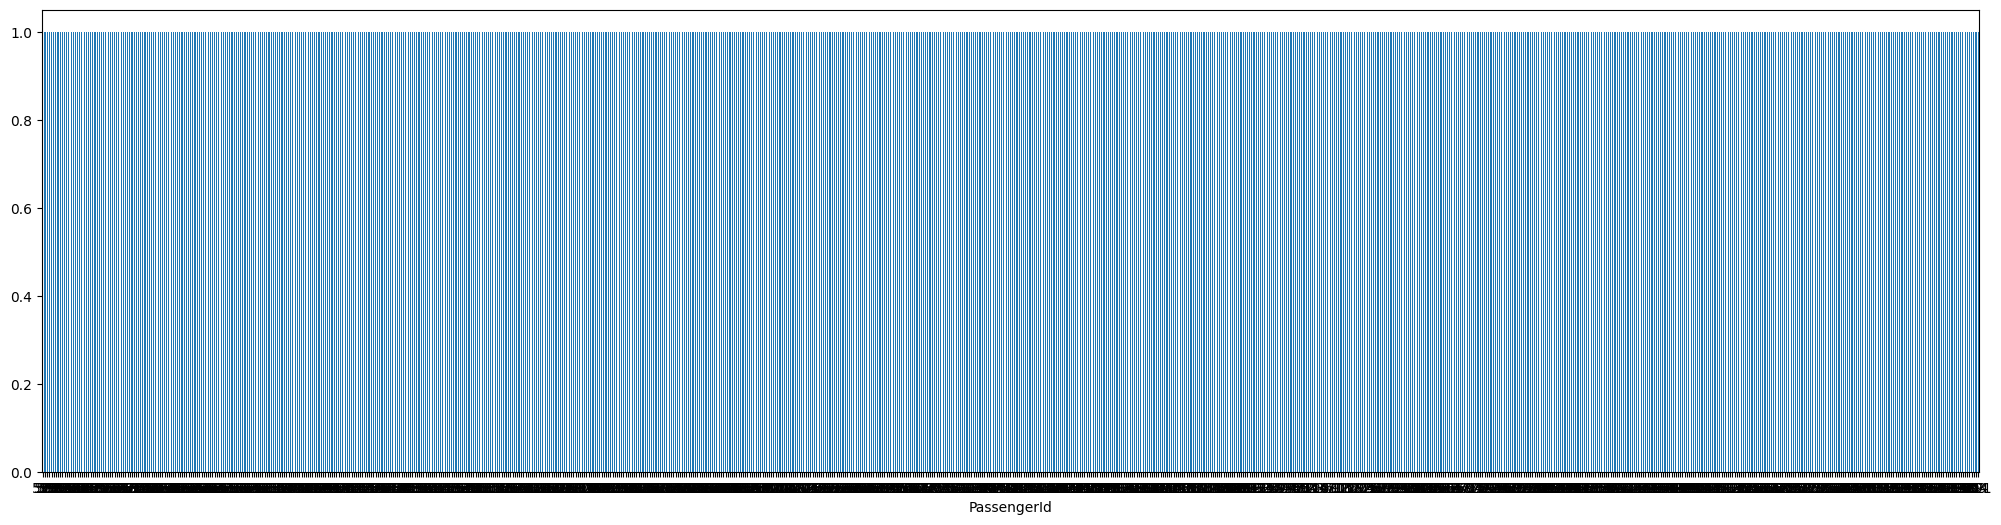

Histogram for Survived :
Survived is skewed to the right and does not have a normal distribution


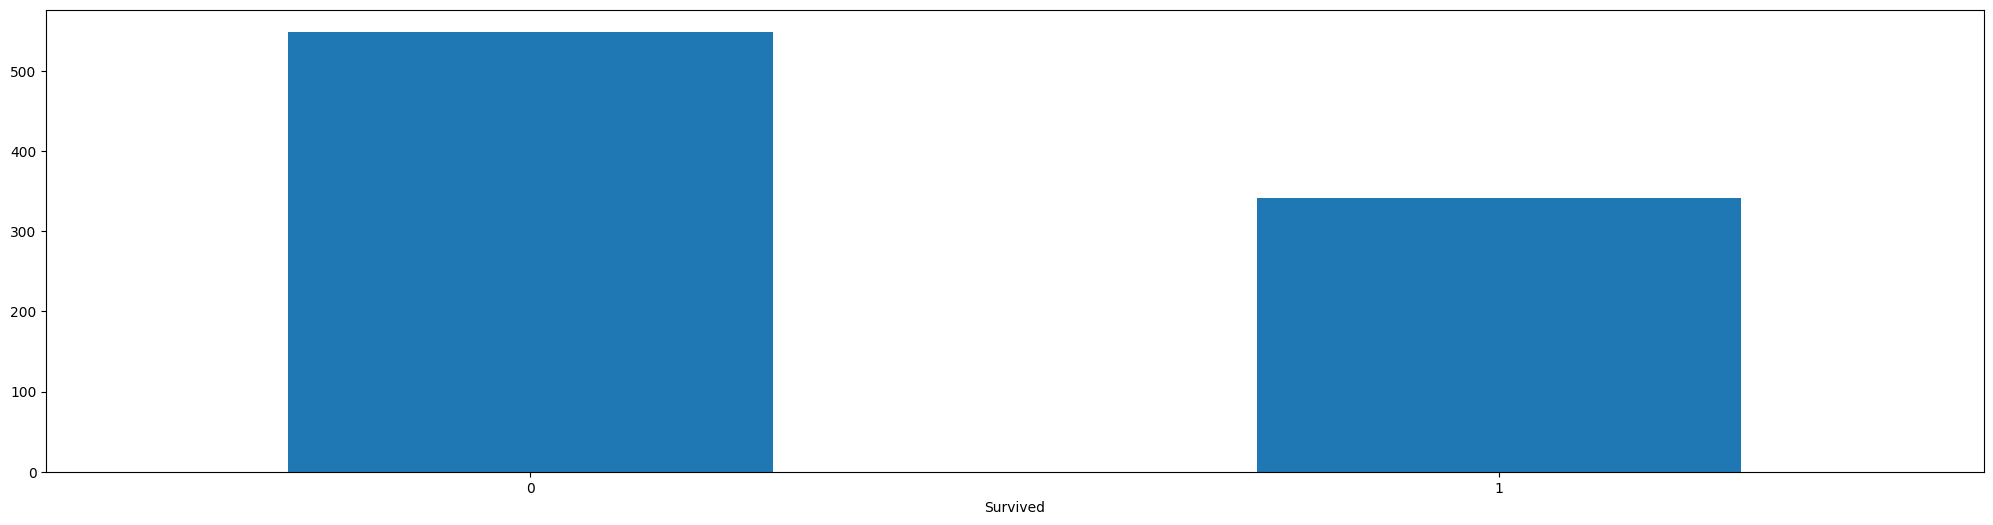

Histogram for Pclass :
Pclass is skewed to the left and does not have a normal distribution


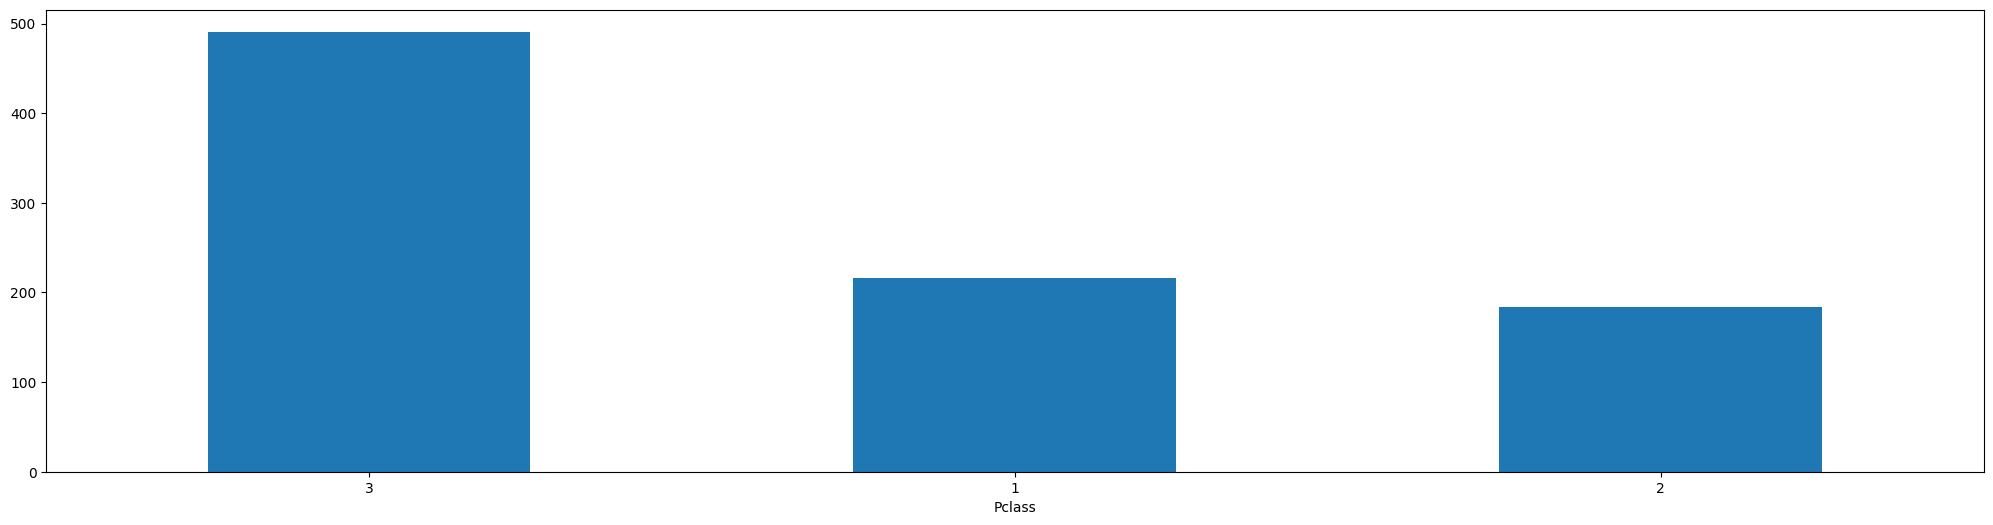

Histogram for Age :
Age is skewed to the right and does not have a normal distribution


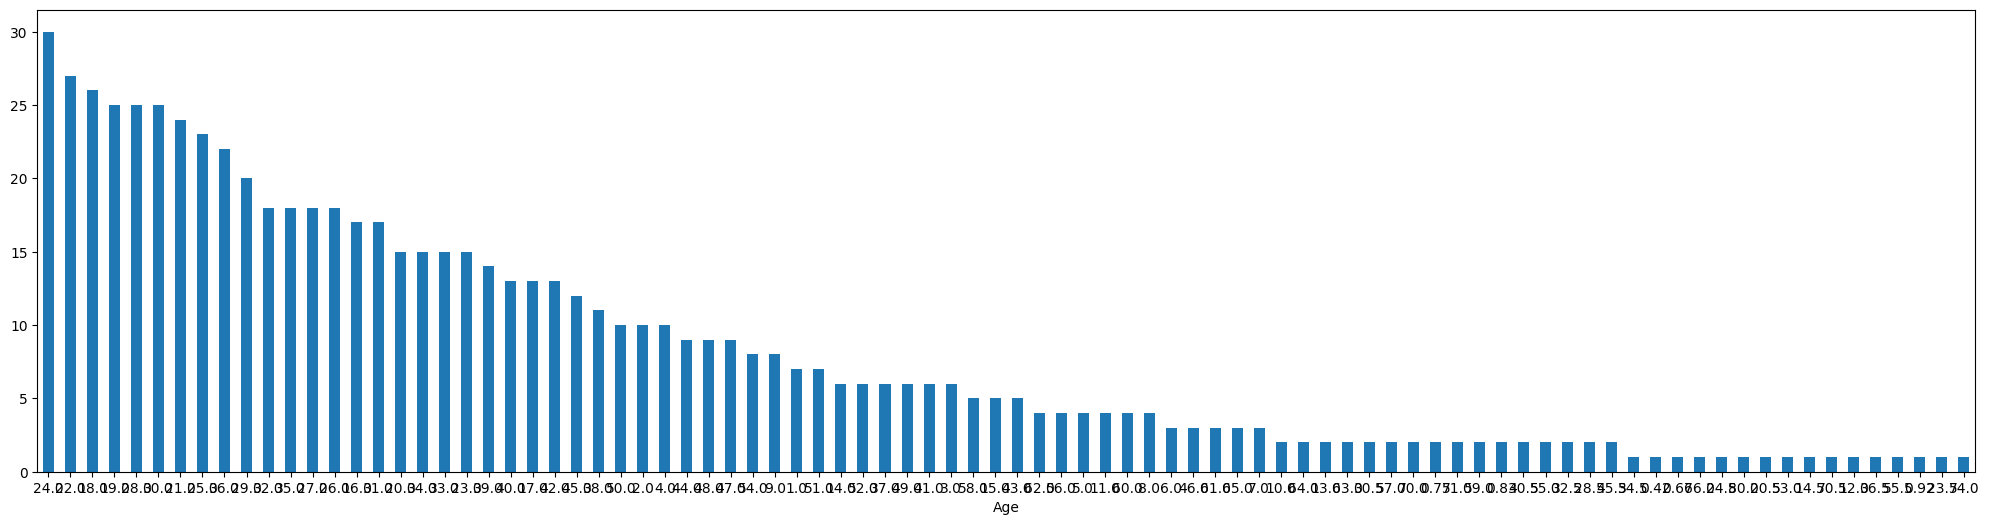

Histogram for SibSp :
SibSp is skewed to the right and does not have a normal distribution


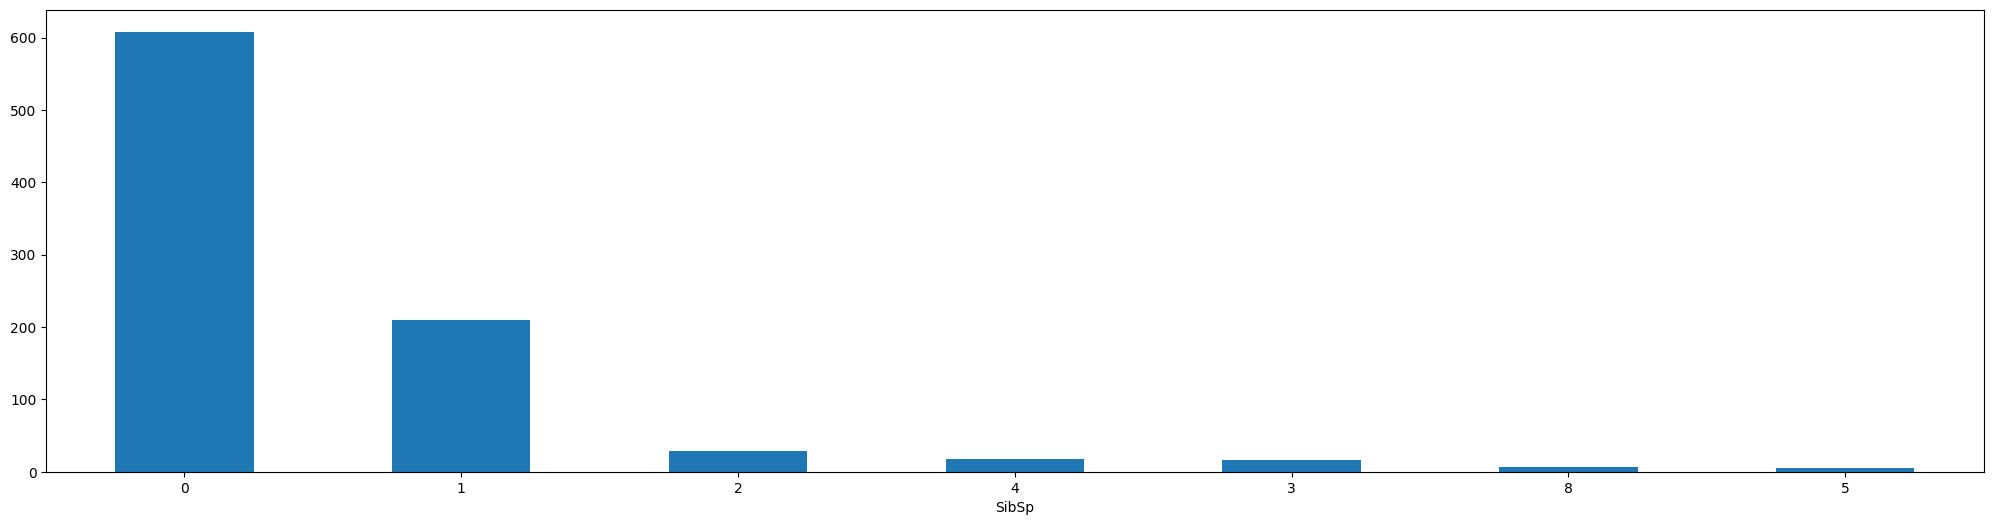

Histogram for Parch :
Parch is skewed to the right and does not have a normal distribution


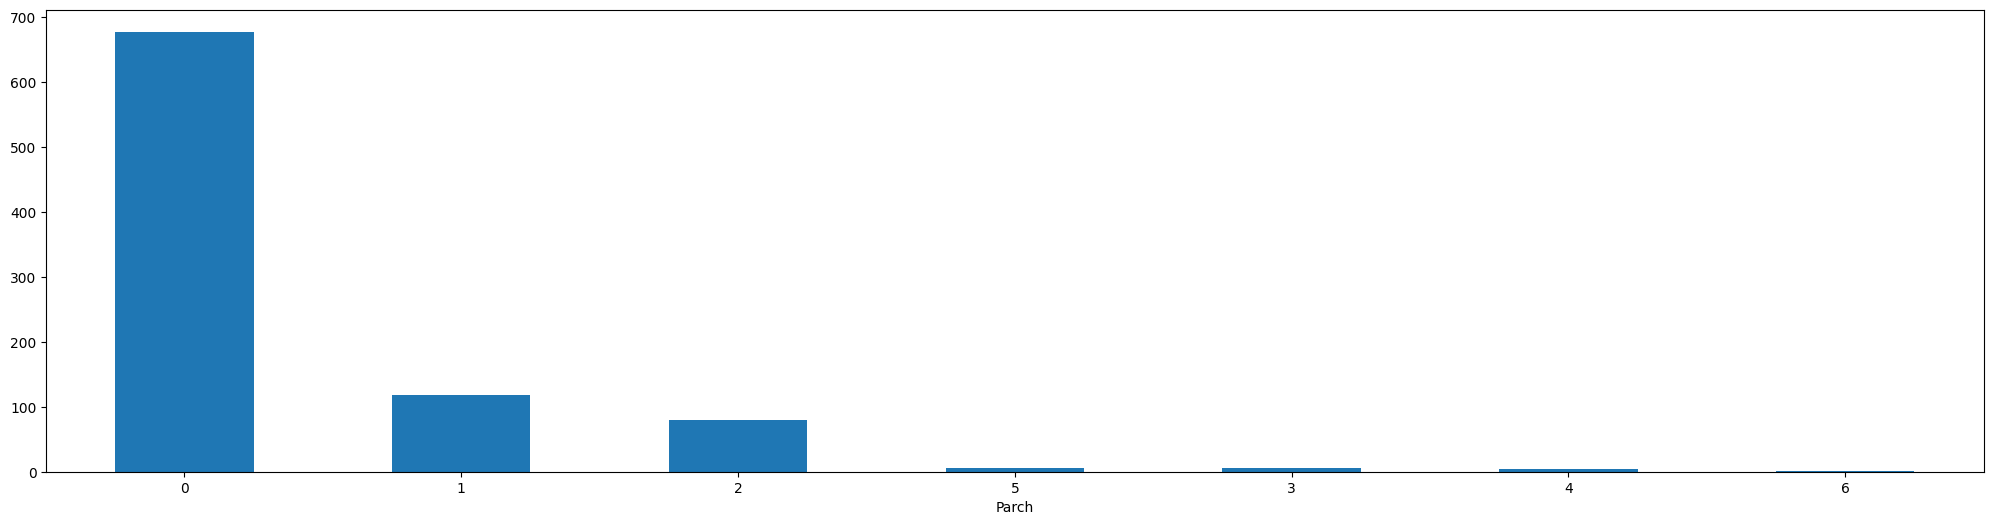

Histogram for Fare :
Fare is skewed to the right and does not have a normal distribution


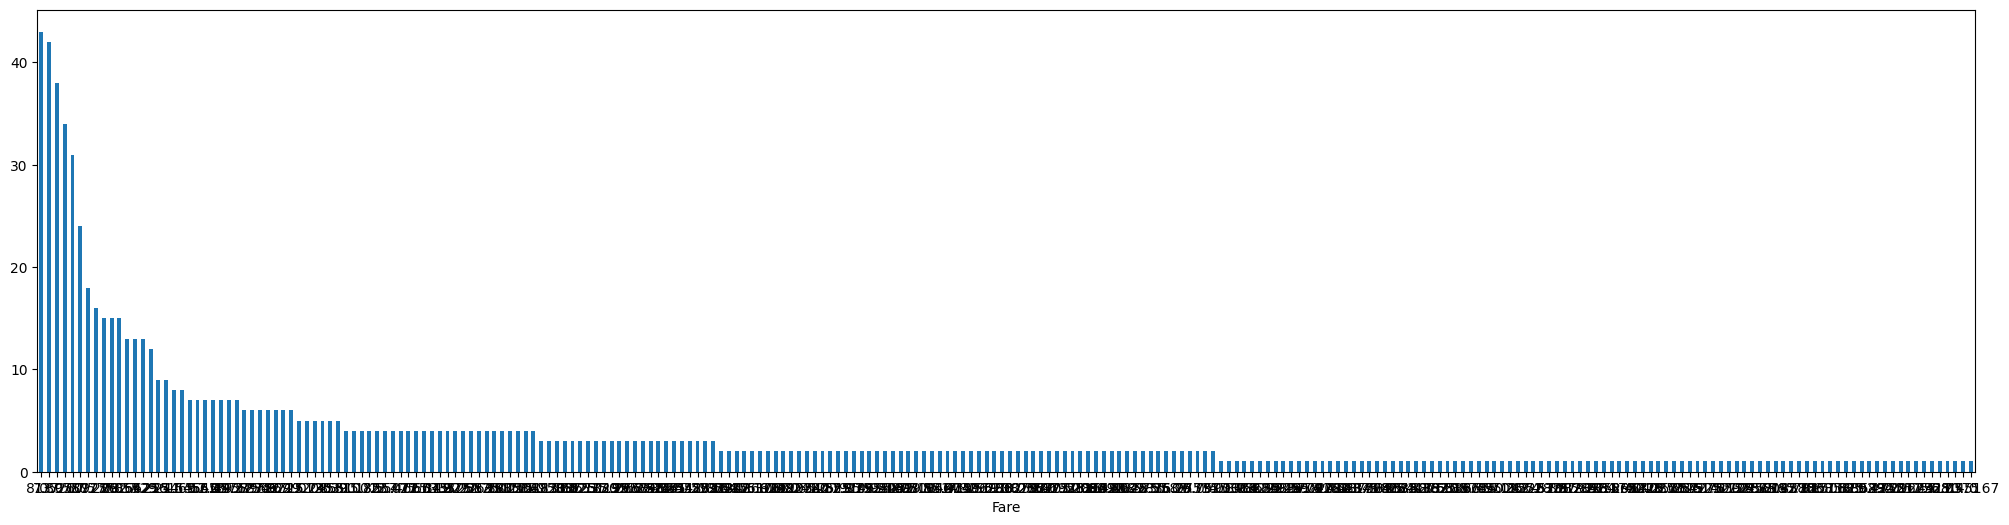

In [50]:
#HISTOGRAM AND BOX PLOT
#for numeric data
for i in df.columns:
  if i not in ['Embarked','Name','Ticket','Sex','Cabin']:
    print(f"Histogram for {i} :")
    plt.figure(figsize=(25,6))
    df[i].value_counts().plot.bar(rot=0)
    skewness = df[i].skew()
    if skewness>0:
      print(f"{i} is skewed to the right and does not have a normal distribution")
    elif skewness<0:
      print(f"{i} is skewed to the left and does not have a normal distribution")
    elif skewness==0:
      print(f"{i} has a normal distribution")
    plt.show()

The data is fairly balanced.
Histogram for Name :


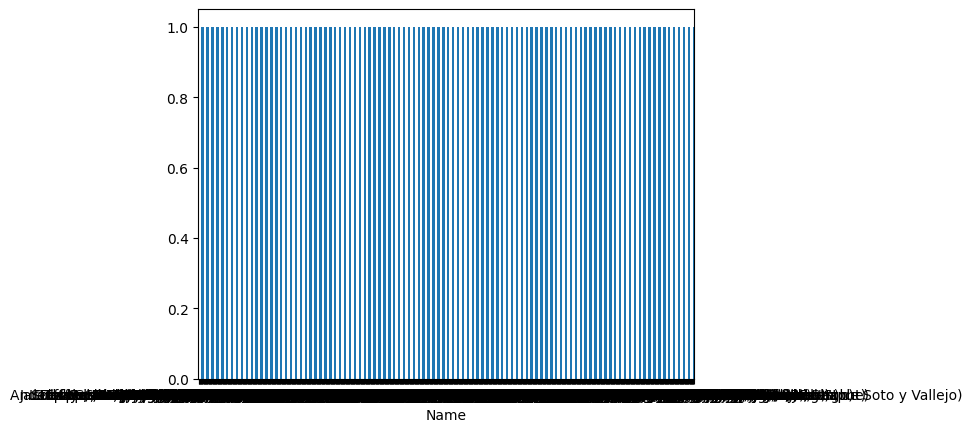

The data is moderately imbalanced.
Histogram for Sex :


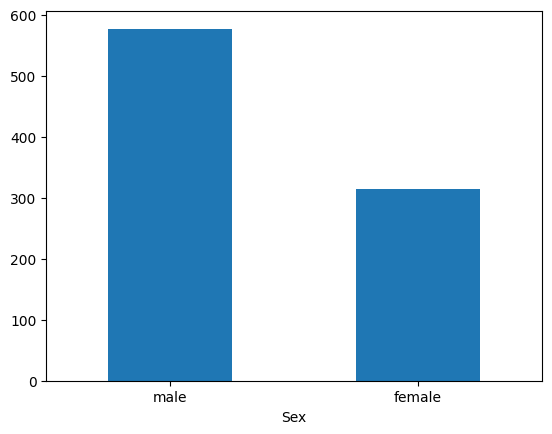

The data is fairly balanced.
Histogram for Ticket :


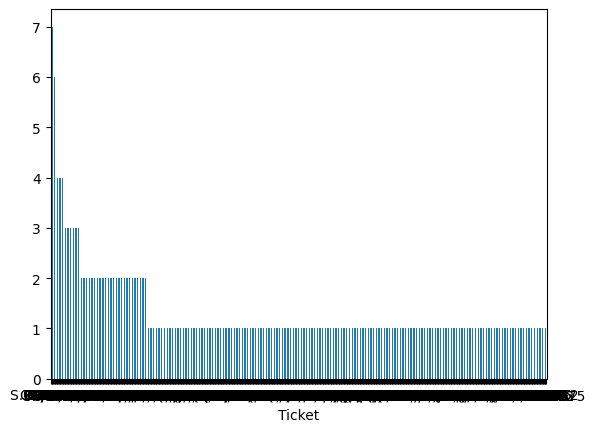

The data is fairly balanced.
Histogram for Cabin :


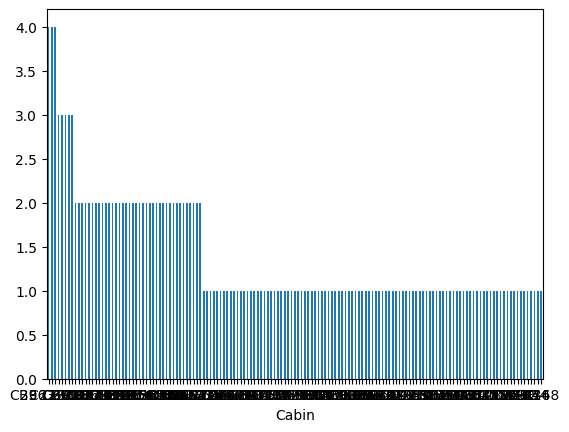

The data is highly imbalanced.
Histogram for Embarked :


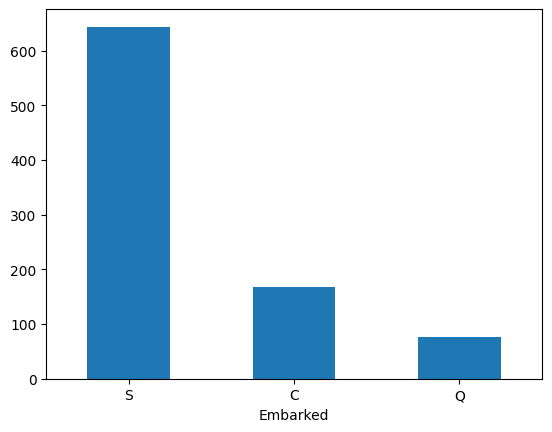

In [55]:
#for categorical data
for i in df.columns:
  if i in ['Embarked','Name','Ticket','Sex','Cabin']:
    freq = df[i].value_counts()
    total = len(df[i])
    max_freq = freq.max()
    max_percentage = (max_freq / total) * 100
    if max_percentage > 70:
        print("The data is highly imbalanced.")
    elif max_percentage > 40:
        print("The data is moderately imbalanced.")
    else:
        print("The data is fairly balanced.")
    print(f"Histogram for {i} :")
    df[i].value_counts().plot.bar(rot=0)
    plt.show()


Boxplot for:  PassengerId


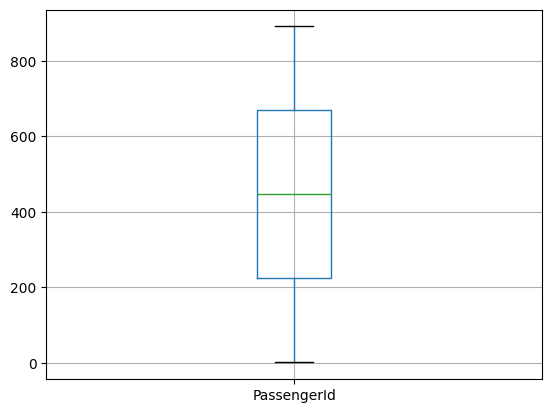

Boxplot for:  Survived


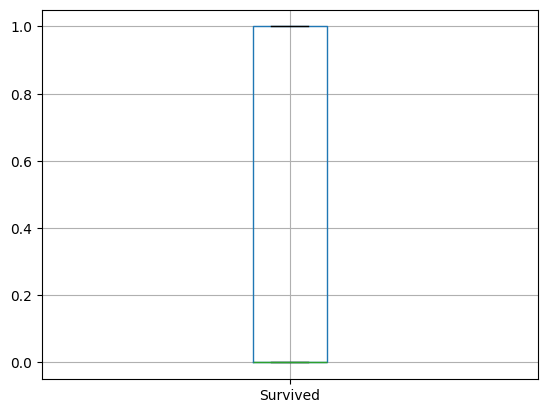

Boxplot for:  Pclass


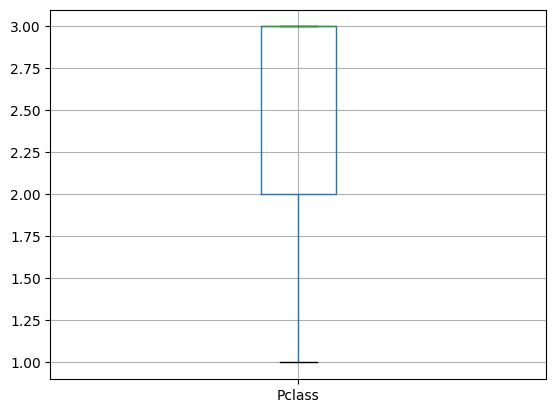

Boxplot for:  Age


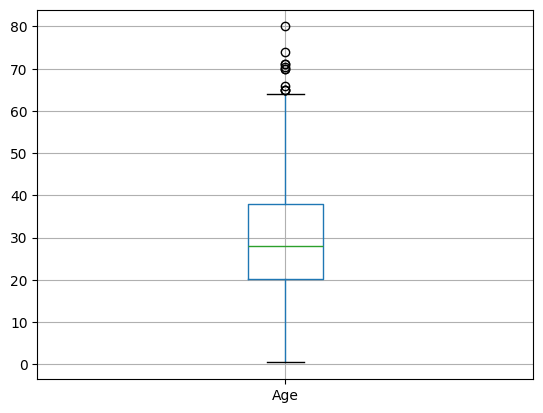

Boxplot for:  SibSp


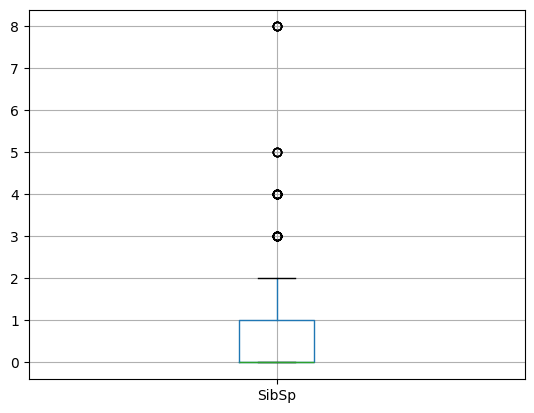

Boxplot for:  Parch


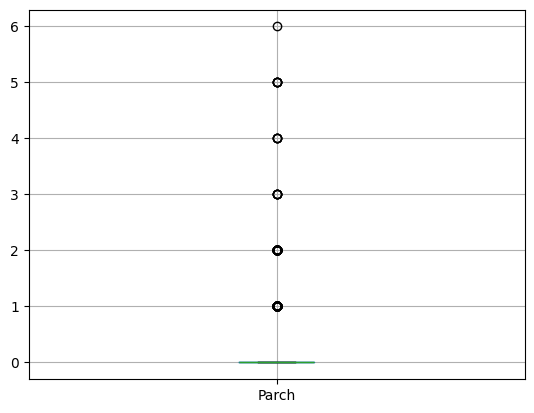

Boxplot for:  Fare


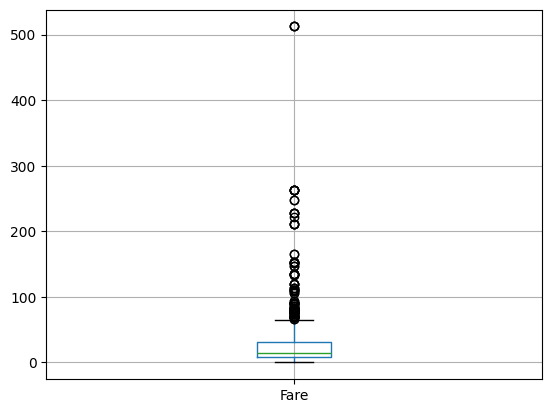

In [59]:
for i in df:
  if i not in ['Embarked','Name','Ticket','Sex','Cabin']:
    print("Boxplot for: ",i)
    plt.figure() #initializing a new figure for each plot
    df.boxplot([i])
    plt.show()

In [77]:
#FINDING MISSING VALUES
for i in df:
  print(f"Missing values in {i} : {df[i].isnull().sum()}")

Missing values in PassengerId : 0
Missing values in Survived : 0
Missing values in Pclass : 0
Missing values in Name : 0
Missing values in Sex : 0
Missing values in Age : 177
Missing values in SibSp : 0
Missing values in Parch : 0
Missing values in Ticket : 0
Missing values in Fare : 0
Missing values in Cabin : 687
Missing values in Embarked : 2


In [76]:
#filling methods
for i in df:
  if df[i].dtype in ['int64','float64']:
    df[i].fillna(df[i].mean())
  elif i=='Ticket' or i=='Name' or i =='Cabin':
    df[i].fillna("Unknown")
  else:
    df[i].fillna(df[i].mode())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. filling numeric values with mean
2. but im choosing to fill ticket, name and cabin with unknown as it shouldnt be filled with mode as in real life perspective, name, cabin no and ticket are unique values

In [83]:
#IRIS DATA
df1 = pd.read_csv('Iris.csv')
#data types
for i in df1:
  print(f"Data type for {i}: {df1[i].dtype}")

Data type for Id: int64
Data type for SepalLengthCm: float64
Data type for SepalWidthCm: float64
Data type for PetalLengthCm: float64
Data type for PetalWidthCm: float64
Data type for Species: object


In [90]:
#no of instances
for i in df1:
  print(f"Total instances in {i} are: {len(df1[i].value_counts())}")

Total instances in Id are: 150
Total instances in SepalLengthCm are: 35
Total instances in SepalWidthCm are: 23
Total instances in PetalLengthCm are: 43
Total instances in PetalWidthCm are: 22
Total instances in Species are: 3


In [107]:
#no of null
for i in df1:
  if i not in 'Id':
    print(f"No of null enteries in {i}: {df1[i].isnull().sum()}")

No of null enteries in SepalLengthCm: 0
No of null enteries in SepalWidthCm: 0
No of null enteries in PetalLengthCm: 0
No of null enteries in PetalWidthCm: 0
No of null enteries in Species: 0


In [109]:
#no of outliers:
no_of_outliers = 0
for i in df1.columns:
  if i not in 'Id':
    if df1[i].dtype in ['int64','float64']:
      Q1= df1[i].quantile(0.25)
      Q3=df1[i].quantile(0.75)
      IQR = Q3-Q1
      lower = Q1-1.5*IQR
      higher = Q3+1.5*IQR
      outlier=  df1[(df1[i]<lower) | (df1[i]>higher)]
      no_of_outlier = outlier.shape[0]
      print(f"No of outliers in {i} is: {no_of_outlier}")

No of outliers in SepalLengthCm is: 0
No of outliers in SepalWidthCm is: 4
No of outliers in PetalLengthCm is: 0
No of outliers in PetalWidthCm is: 0


In [106]:
#min value
for i in df1.columns:
  if i not in 'Id':
    mini = df1[i].min()
    print(f"The min value in {i} is: {mini}")

The min value in SepalLengthCm is: 4.3
The min value in SepalWidthCm is: 2.0
The min value in PetalLengthCm is: 1.0
The min value in PetalWidthCm is: 0.1
The min value in Species is: Iris-setosa


In [110]:
#max value
for i in df1.columns:
  if i not in 'Id':
    maxi = df1[i].max()
    print(f"The maximum value in {i} is: {maxi}")

The maximum value in SepalLengthCm is: 7.9
The maximum value in SepalWidthCm is: 4.4
The maximum value in PetalLengthCm is: 6.9
The maximum value in PetalWidthCm is: 2.5
The maximum value in Species is: Iris-virginica


In [113]:
#mode
for i in df1.columns:
  if i not in 'Id':
    print(f"The mode in {i} is: {df1[i].mode()[0]}")

The mode in SepalLengthCm is: 5.0
The mode in SepalWidthCm is: 3.0
The mode in PetalLengthCm is: 1.5
The mode in PetalWidthCm is: 0.2
The mode in Species is: Iris-setosa


In [116]:
#mean
for i in df1.columns:
  if i not in ['Id','Species']:
    print(f"The mean in {i} is: {df1[i].mean()}")

The mean in SepalLengthCm is: 5.843333333333334
The mean in SepalWidthCm is: 3.0540000000000003
The mean in PetalLengthCm is: 3.758666666666666
The mean in PetalWidthCm is: 1.1986666666666668


In [118]:
#varience
for i in df1.columns:
  if i not in ['Id','Species']:
    print(f"The varience in {i} is: {df1[i].var()}")

The varience in SepalLengthCm is: 0.6856935123042505
The varience in SepalWidthCm is: 0.18800402684563763
The varience in PetalLengthCm is: 3.1131794183445156
The varience in PetalWidthCm is: 0.5824143176733784


In [119]:
#median
for i in df1.columns:
  if i not in ['Id','Species']:
    print(f"The median in {i} is: {df1[i].median()}")

The median in SepalLengthCm is: 5.8
The median in SepalWidthCm is: 3.0
The median in PetalLengthCm is: 4.35
The median in PetalWidthCm is: 1.3


In [120]:
#stadard deviation
for i in df1.columns:
  if i not in ['Id','Species']:
    print(f"The standard deviation in {i} is: {df1[i].std()}")

The standard deviation in SepalLengthCm is: 0.8280661279778629
The standard deviation in SepalWidthCm is: 0.4335943113621737
The standard deviation in PetalLengthCm is: 1.7644204199522617
The standard deviation in PetalWidthCm is: 0.7631607417008414


Histogram for Id:


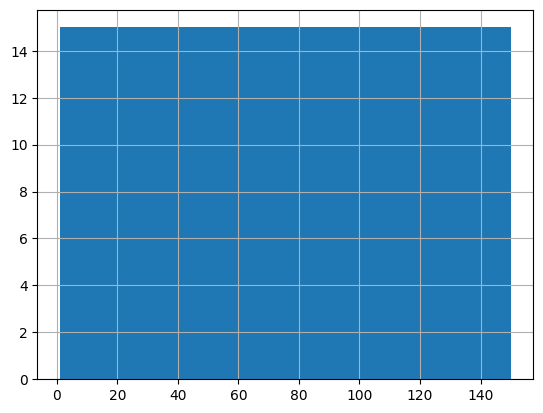

SepalLengthCm is rightly skewed.
Histogram for SepalLengthCm:


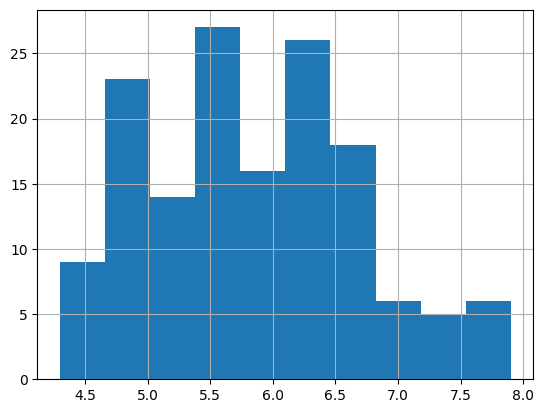

SepalWidthCm is rightly skewed.
Histogram for SepalWidthCm:


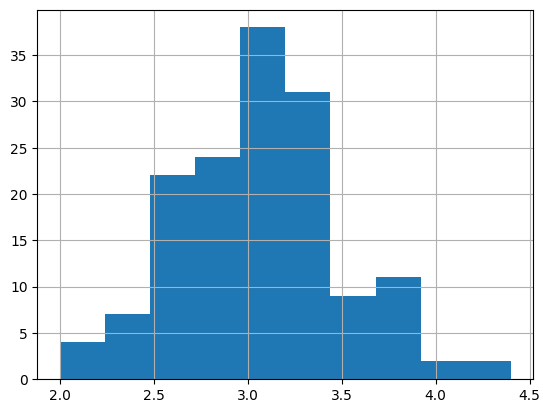

PetalLengthCm is left skewed.
Histogram for PetalLengthCm:


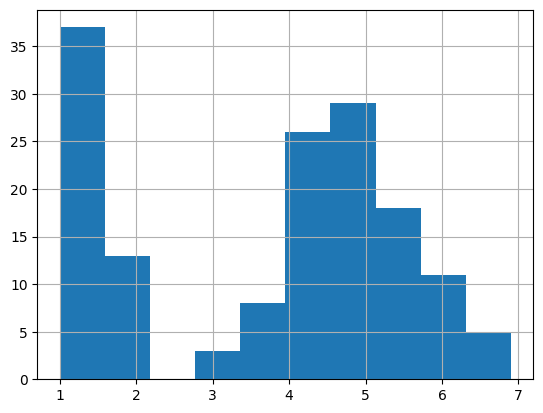

PetalWidthCm is left skewed.
Histogram for PetalWidthCm:


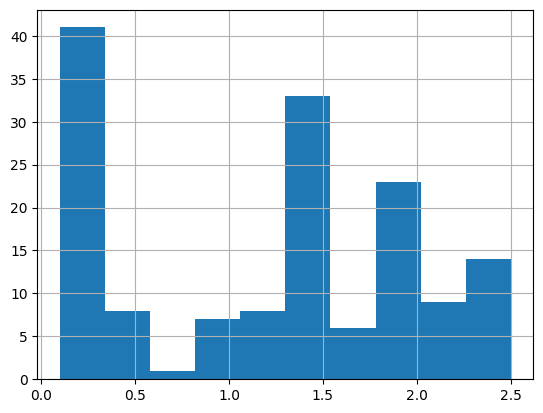

Histogram for Species:


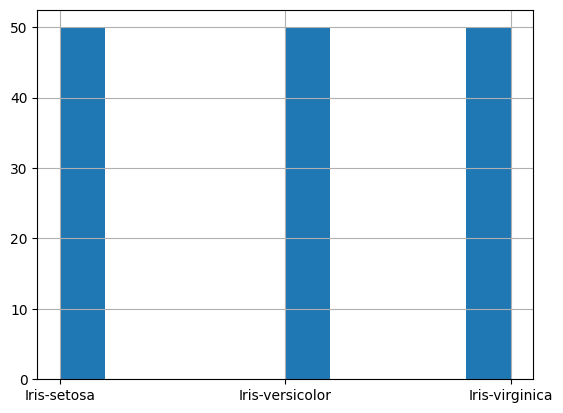

In [139]:
#histograms
for i in df1:
  if i not in ['Id','Species']:
    df1[i].hist()
    skewness = df1[i].skew()
    if skewness>0:
      print(f"{i} is rightly skewed.")
    elif skewness<0:
      print(f"{i} is left skewed.")
    else:
      print(f"{i} is normalized.")
    print(f"Histogram for {i}:")
    plt.show()
  else:
    print(f"Histogram for {i}:")
    df1[i].hist()
    plt.show()

Boxplot for SepalLengthCm


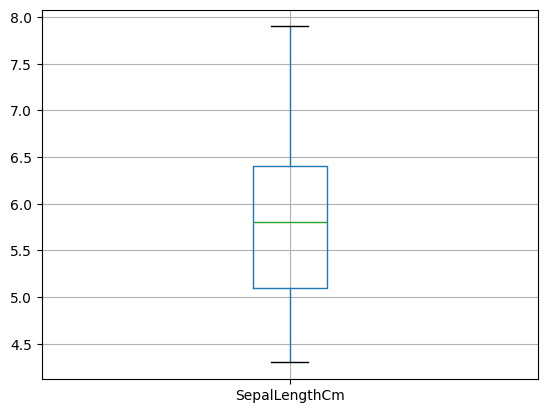

Boxplot for SepalWidthCm


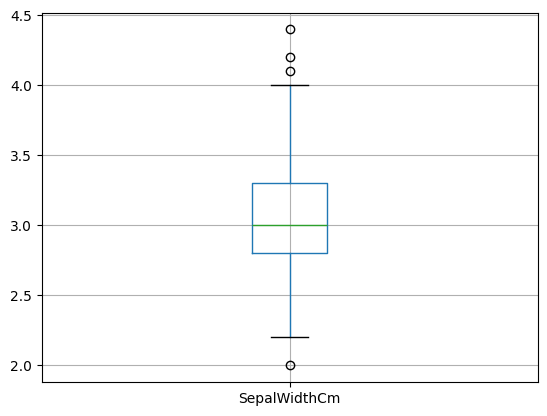

Boxplot for PetalLengthCm


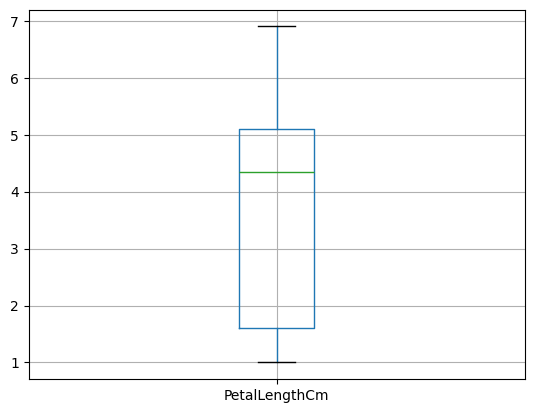

Boxplot for PetalWidthCm


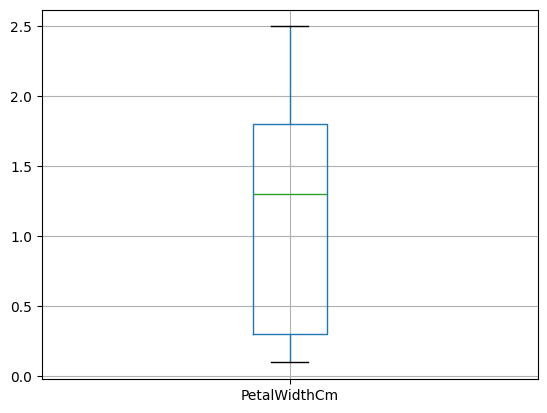

In [132]:
#boxplot
for i in df1:
  if i not in 'Id':
    if df1[i].dtype in ['int64','float64']:
      print("Boxplot for", i)
      plt.figure()
      df1.boxplot([i])
      plt.show()


In [137]:
#no of missing values
for i in df1:
  if i not in 'Id':
    print(f"Missing values in {i}: {df1[i].isnull().sum()}")

Missing values in SepalLengthCm: 0
Missing values in SepalWidthCm: 0
Missing values in PetalLengthCm: 0
Missing values in PetalWidthCm: 0
Missing values in Species: 0


In [138]:
#modes for tackling missing values
for i in df1:
  if i not in 'Id':
    if df1[i].dtype in ['int64','float64']:
      df1[i].fillna(df1[i].mean())
    else:
      df1[i].fillna(df1[i].mode())
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


1. filling categorical value for species with mode
2. filling numeric value for other dimensions with mean